In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Titanic-Dataset.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df['Age'] = df["Age"].fillna(df['Age'].mean()).astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df['Embarked'] = df['Embarked'].fillna(df["Embarked"].mode()[0])

In [38]:
df.shape

(891, 12)

In [39]:
df.drop('Cabin',axis=1,inplace=True)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [41]:
df['Name'].value_counts()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

In [42]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, drop=None)

sex_encoded = encoder.fit_transform(df[['Sex']])

sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))
df = df.drop(columns=['Sex'])
df = pd.concat([df, sex_encoded_df], axis=1)


In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0.0,1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Sex_female   891 non-null    float64
 11  Sex_male     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [46]:
df['Sex_female'] = df['Sex_female'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Sex_female   891 non-null    int64  
 11  Sex_male     891 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 83.7+ KB


In [48]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [49]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
embarked_encoded = encoder.fit_transform(df[['Embarked']])

embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))
df = df.drop(columns=['Embarked'])
df = pd.concat([df, embarked_encoded_df], axis=1)


In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22,1,0,523,7.2500,0,1,0.0,0.0,1.0
1,2,1,1,190,38,1,0,596,71.2833,1,0,1.0,0.0,0.0
2,3,1,3,353,26,0,0,669,7.9250,1,0,0.0,0.0,1.0
3,4,1,1,272,35,1,0,49,53.1000,1,0,0.0,0.0,1.0
4,5,0,3,15,35,0,0,472,8.0500,0,1,0.0,0.0,1.0


In [51]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  Embarked_C   891 non-null    float64
 12  Embarked_Q   891 non-null    float64
 13  Embarked_S   891 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 97.6 KB


In [53]:
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  Embarked_C   891 non-null    int64  
 12  Embarked_Q   891 non-null    int64  
 13  Embarked_S   891 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.6 KB


In [54]:
df['Fare'] = df['Fare'].astype(int)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22,1,0,523,7,0,1,0,0,1
1,2,1,1,190,38,1,0,596,71,1,0,1,0,0
2,3,1,3,353,26,0,0,669,7,1,0,0,0,1
3,4,1,1,272,35,1,0,49,53,1,0,0,0,1
4,5,0,3,15,35,0,0,472,8,0,1,0,0,1


<Axes: >

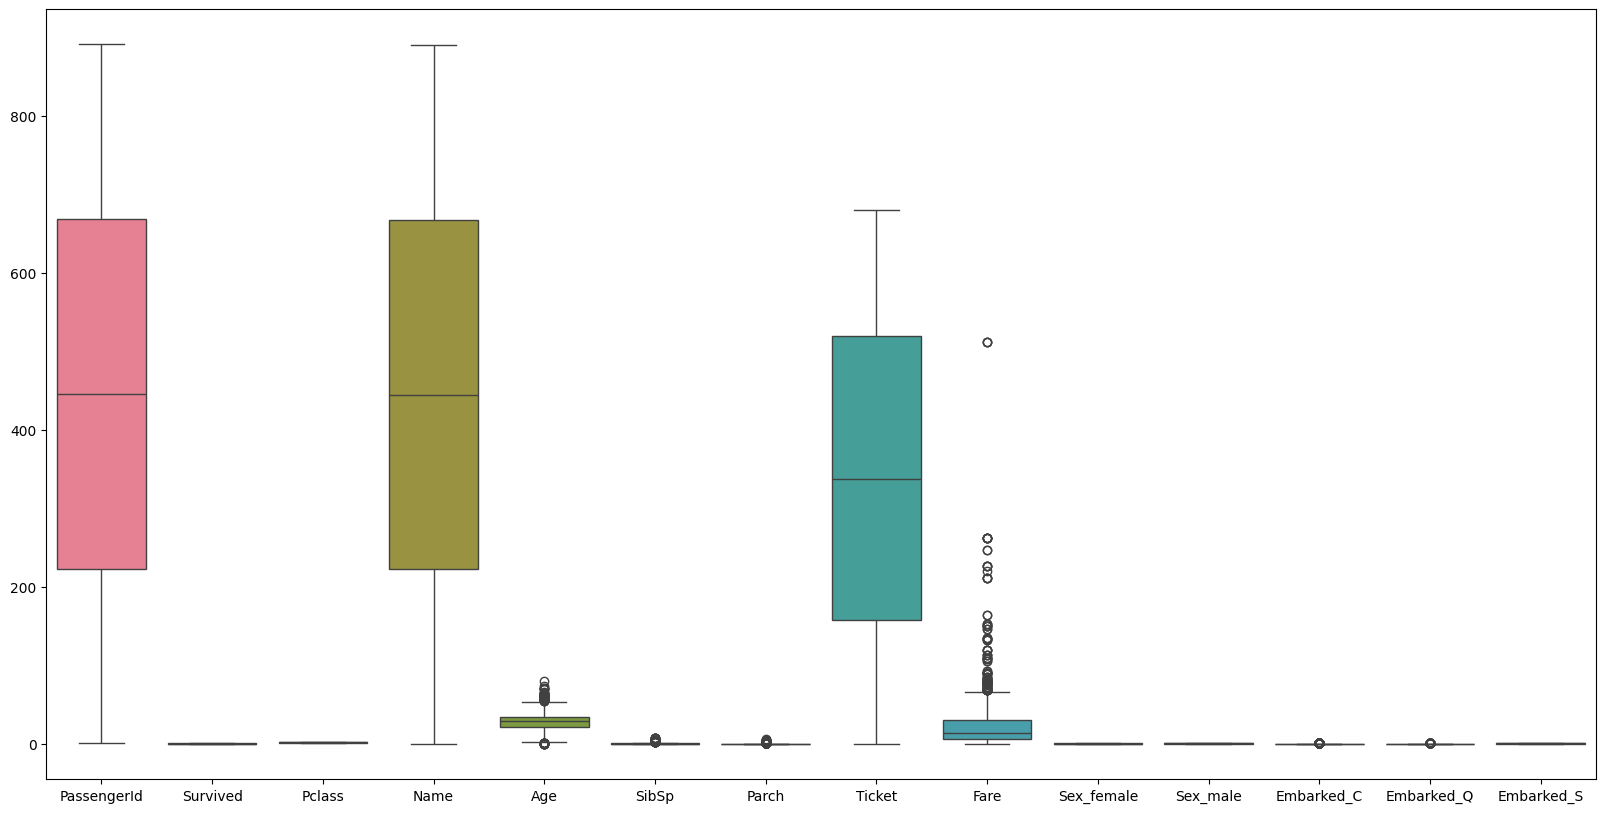

In [64]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [65]:
df.describe()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,29.544332,0.523008,0.381594,338.528620,31.785634,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,257.353842,13.013778,1.102743,0.806057,200.850657,49.703730,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,22.000000,0.000000,0.000000,158.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,445.000000,29.000000,0.000000,0.000000,337.000000,14.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,667.500000,35.000000,1.000000,0.000000,519.500000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,890.000000,80.000000,8.000000,6.000000,680.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000
